100%|██████████| 1000/1000 [00:08<00:00, 118.47it/s]


(array([459.,   5.,   2.,   3.,   6.,  24., 146., 240., 110.,   5.]),
 array([0.01 , 0.085, 0.16 , 0.235, 0.31 , 0.385, 0.46 , 0.535, 0.61 ,
        0.685, 0.76 ]),
 <BarContainer object of 10 artists>)

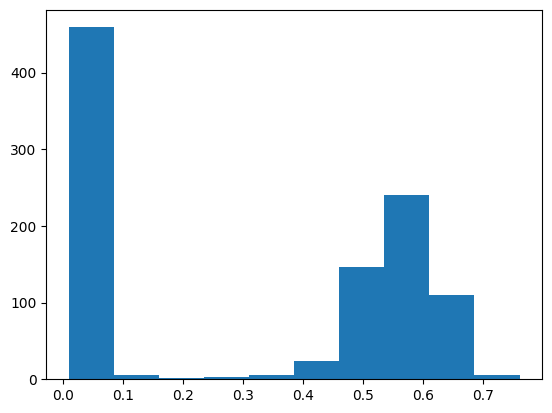

In [23]:
import networkx as nx
import random
from collections import deque
from tqdm import tqdm

# Step 2: Perform dynamic percolation that stops when s nodes are percolated
def percolate_graph(G, p_m, s):
    """
    Performs dynamic percolation on graph G with transmission probability p_m,
    starting from a random node, and stops when s nodes have been percolated.
    """
    if s <= 0 or G.number_of_nodes() == 0:
        return nx.Graph()
    
    percolated_nodes = set()
    initial_node = random.choice(list(G.nodes()))
    percolated_nodes.add(initial_node)
    queue = deque([initial_node])
    
    while queue and len(percolated_nodes) < s:
        current_node = queue.popleft()
        for neighbor in G.neighbors(current_node):
            if neighbor not in percolated_nodes and random.random() < p_m:
                percolated_nodes.add(neighbor)
                queue.append(neighbor)
                if len(percolated_nodes) >= s:
                    break  # Stop if we've reached s nodes
    G_perc = G.subgraph(percolated_nodes).copy()
    return G_perc

G_perc = percolate_graph(G, p_m, s)

# Step 3: Use the percolated graph as the susceptible subgraph
G_susceptible = G_perc

# Step 4: Simulate the epidemic on the susceptible subgraph
def simulate_epidemic(G, p_i):
    """
    Simulates an epidemic on graph G with infection probability p_i.
    """
    if G.number_of_nodes() == 0:
        return set()
    
    susceptible = set(G.nodes())
    infected = set()
    initial_node = random.choice(list(G.nodes()))
    infected.add(initial_node)
    susceptible.remove(initial_node)
    queue = deque([initial_node])

    while queue:
        current_node = queue.popleft()
        for neighbor in G.neighbors(current_node):
            if neighbor in susceptible and random.random() < p_i:
                susceptible.remove(neighbor)
                infected.add(neighbor)
                queue.append(neighbor)
    return infected

def fs_epi(n, m, p, p_m, p_i, s, N):
    """
    Parameters
    n:      Number of nodes in the network
    m:      Each new node attaches to m existing nodes
    p:      Probability of creating a triangle after adding a random edge
    p_m:    Probability for meta-infection (percolation)
    p_i:    Probability for epidemic infection
    s:      Maximum number of nodes to percolate
    """
    final_size = []
    for _ in tqdm(range(N)):
        #Generate a clustered network using the powerlaw_cluster_graph function
        G = nx.powerlaw_cluster_graph(n, m, p)
        #Run percolation
        G_perc = percolate_graph(G, p_m, s)
        infected_nodes = simulate_epidemic(G_susceptible, p_i)
        final_size.append(len(infected_nodes)/len(G_susceptible.nodes))
    return final_size

# Parameters
n = 1000      # Number of nodes in the network
m = 5         # Each new node attaches to m existing nodes
p = 0.3       # Probability of creating a triangle after adding a random edge
p_m = 0.5     # Probability for meta-infection (perdcolation)
p_i = 0.3     # Probability for epidemic infection
s = 100       # Maximum number of nodes to percolate

final_size = fs_epi(n, m, p, p_m, p_i, s, N = 1000)
plt.hist(final_size)
